 https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/house_rental_data.csv.txt


Use pandas to get some insights into the data (10 marks)
Show some interesting visualization of the data (10 marks)
Manage data for training & testing (20)
Finding a better value of k (10)

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
data=pd.read_csv(r"H:\Maha Laptop Disk D\DS291022B\DSA_advanced\house_rental_data.csv.txt")
data.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [3]:
data.corr()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
Unnamed: 0,1.000000,-0.065182,-0.021299,-0.039687,-0.008638,-0.027035,-0.007877,-0.077512
Sqft,-0.065182,1.000000,0.143249,0.304515,0.615608,0.455940,0.728869,0.825514
Floor,-0.021299,0.143249,1.000000,0.564221,0.023986,-0.023563,0.099772,0.244553
TotalFloor,-0.039687,0.304515,0.564221,1.000000,0.067298,0.029373,0.146132,0.333631
Bedroom,-0.008638,0.615608,0.023986,0.067298,1.000000,0.526532,0.643083,0.467059
Living.Room,-0.027035,0.455940,-0.023563,0.029373,0.526532,1.000000,0.546826,0.328788
Bathroom,-0.007877,0.728869,0.099772,0.146132,0.643083,0.546826,1.000000,0.605542
Price,-0.077512,0.825514,0.244553,0.333631,0.467059,0.328788,0.605542,1.000000


In [4]:
data.shape

(645, 8)

In [5]:
data.isnull().sum()

Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [6]:
data.columns

Index(['Unnamed: 0', 'Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room',
       'Bathroom', 'Price'],
      dtype='object')

In [7]:
data.describe()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,325.159690,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,187.312152,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,1.000000,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,164.000000,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,326.000000,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,487.000000,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,648.000000,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [8]:
print(f"Mean Price: {data.Price.mean()}")
print(f"Median Price: {data.Price.median()}")
print(f"Highest Price: {data.Price.max()}")
print(f"Lowest Price: {data.Price.min()}")

Mean Price: 61986.82325581396
Median Price: 50000.0
Highest Price: 250000
Lowest Price: 6100


<Axes: xlabel='Price', ylabel='Sqft'>

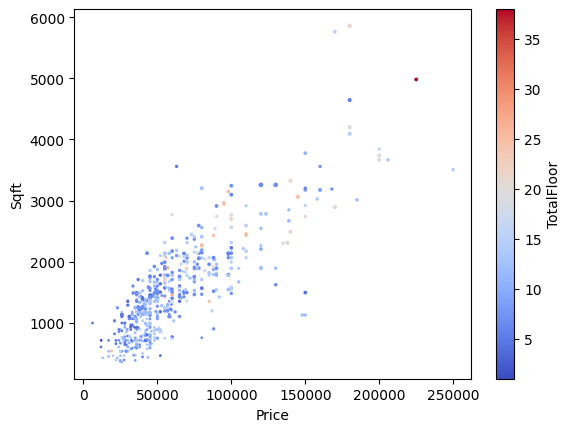

In [9]:
data.plot.scatter(x='Price', y='Sqft', c='TotalFloor',s=data['Bathroom'], cmap='coolwarm')

In [10]:
import seaborn as sns

<Axes: title={'center': 'Price'}, xlabel='Bathroom'>

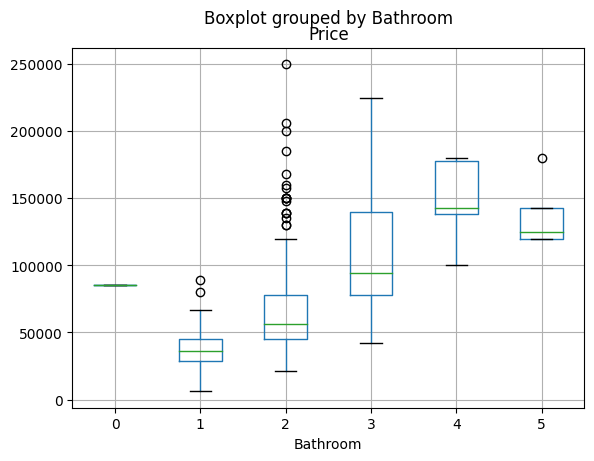

In [11]:
data.boxplot(column='Price',by='Bathroom')

<Axes: >

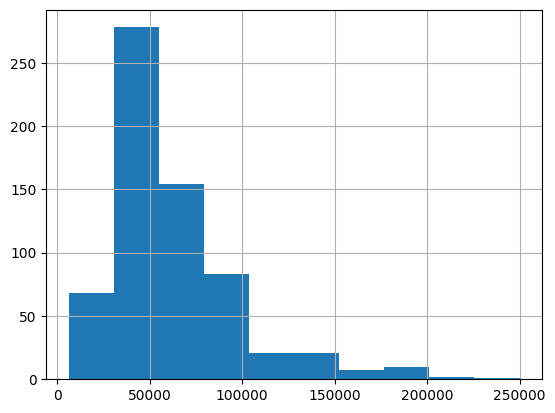

In [12]:
data['Price'].hist(bins=10)

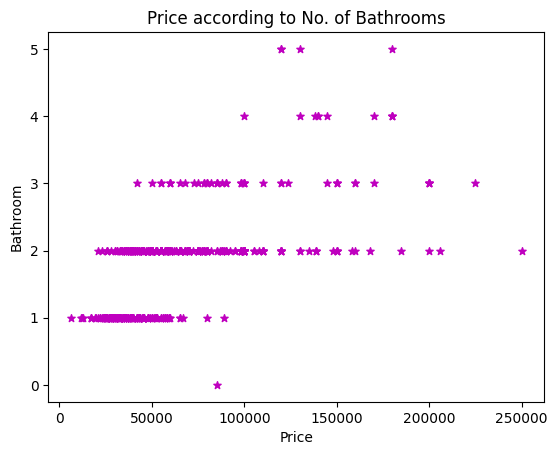

In [13]:
plt.scatter(x=data['Price'],y=data['Bathroom'],color="m",marker="*",s=30)
plt.xlabel("Price")
plt.ylabel("Bathroom")
plt.title("Price according to No. of Bathrooms")
plt.show()


In [14]:
data['Bathroom'].value_counts()

2    386
1    198
3     46
4     10
5      4
0      1
Name: Bathroom, dtype: int64

In [15]:
data['Bathroom'].value_counts().values


array([386, 198,  46,  10,   4,   1], dtype=int64)

In [16]:
data['Bathroom'].value_counts().index

Int64Index([2, 1, 3, 4, 5, 0], dtype='int64')

In [17]:
data['Bedroom'].value_counts()

3    239
2    161
4    161
1     69
5     13
6      1
7      1
Name: Bedroom, dtype: int64

In [18]:
data['Floor'].value_counts().values

array([103,  88,  75,  75,  69,  42,  36,  34,  26,  22,  19,  14,  13,
         7,   6,   4,   4,   3,   2,   2,   1], dtype=int64)

In [19]:
from sklearn.model_selection import train_test_split
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=24)
print(f"Train:{x_train.shape},{y_train.shape}")
print(f"Test: {x_test.shape},{y_test.shape}")

Train:(516, 7),(516,)
Test: (129, 7),(129,)


In [21]:
from sklearn import preprocessing
x_train_norm=preprocessing.normalize(x_train)
x_test_norm=preprocessing.normalize(x_test)

In [23]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,random_state=0, n_init='auto')
kmeans.fit(x_train_norm)

KMeans(n_clusters=3, n_init='auto', random_state=0)

<Axes: >

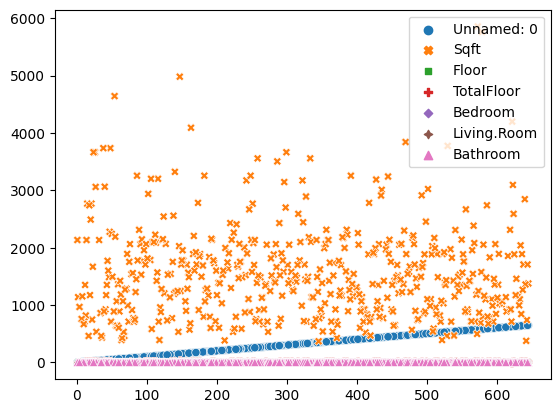

In [24]:
import seaborn as sns
sns.scatterplot(data=x_train)
